<a href="https://colab.research.google.com/github/EnsiyehRaoufi/ML_Models_Linear_treebased_XGBoost__AutoGluon/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import xgboost as xgb
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [13]:
#Load in the wine dataset from scikit learn.
wine = datasets.load_wine()
df = pd.DataFrame(wine['data'], columns=wine['feature_names'] )
df['target'] = wine['target']

In [28]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
#For the wine dataset, create a train and test split, 80% train / 20% test.
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0 )

In [19]:
#Load the train/test data into the xgboost matrix
df_train_xgb = xgb.DMatrix(df_train.loc[:, df_train.columns!='target'], label=df_train['target'])
df_test_xgb = xgb.DMatrix(df_test.loc[:, df_test.columns!='target'], label=df_test['target'])

Create a XGBoost Classifier model with these hyperparameters:
* max_depth: 5
* eta: 0.1
* objective: multi:softmax
* num_class: 3
* num_round: 100

In [20]:
num_round = 100
params = {"max_depth":5, "eta":0.1, "objective": "multi:softmax", "num_class":3}
bst = xgb.train(params, df_train_xgb, num_round)

In [22]:
#Evaluate the model with the test dataset
xgb_prediction = bst.predict(df_test_xgb)

In [26]:
#Accuracy score using sklearn function for classification metric
accuracy_score(df_test["target"], xgb_prediction)

0.9444444444444444

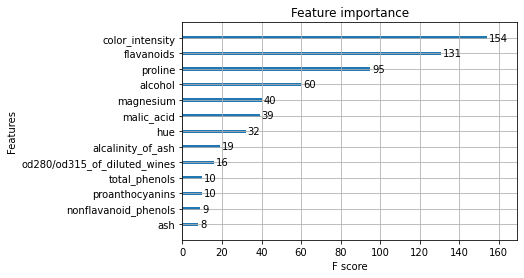

In [27]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)

# **XGBoost Regression**

In [29]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [30]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [31]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [32]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(
    dfd_train.loc[:, dfd_train.columns != "target"], label=dfd_train["target"]
)
dtest = xgb.DMatrix(
    dfd_test.loc[:, dfd_test.columns != "target"], label=dfd_test["target"]
)

In [33]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
param = {
    "max_depth": 2,
    "eta": 0.03,
    "gamma": 0.09,
    "colsample_bytree": 0.5,
    "objective": "reg:squarederror",
}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [34]:
# xgboost is not scikit learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)

In [35]:
# R2 score using scikit learn function for regression metric
r2_score(dfd_test["target"], preds)

0.32238955135659975

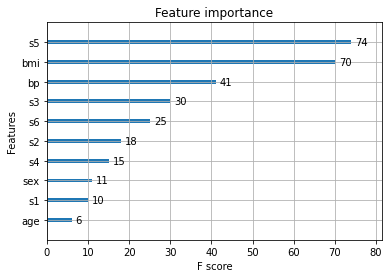

In [36]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)